# **Machine Learning Workflow**


---


## Classifying Smokers vs Non Smokers

**Objective:**

Our goal is not only to make a prediction, it is to make a prediction with the best possible way. So we will be building, evaluating, and improving our model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

In [ ]:
nb_rows = df.shape[0]
nb_cols = df.shape[1]
print(f"Number of rows: {nb_rows}")
print(f"Number of columns: {nb_cols}")

Number of rows: 1338
Number of columns: 7


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data_numeric = df.select_dtypes(include=['number'])
data_numeric.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']
print(f"Number of smokers: {smokers.shape[0]}")
print(f"Number of non-smokers: {non_smokers.shape[0]}")

Number of smokers: 274
Number of non-smokers: 1064


We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

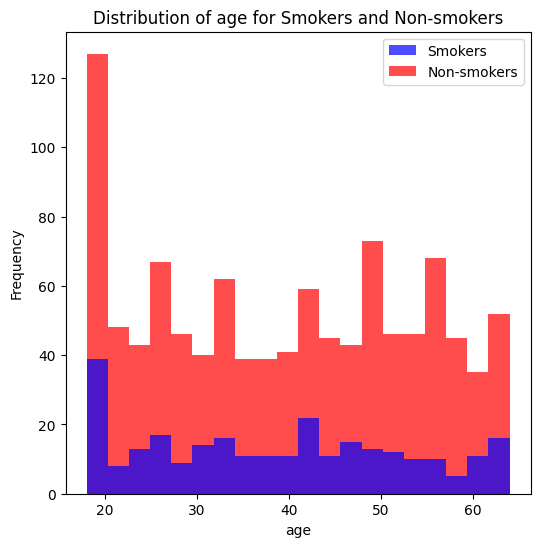

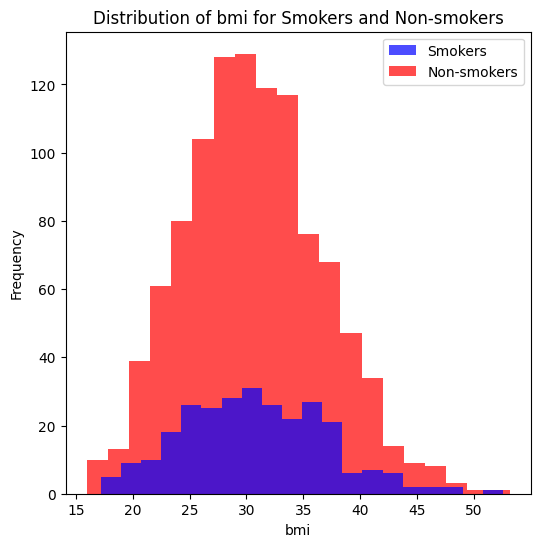

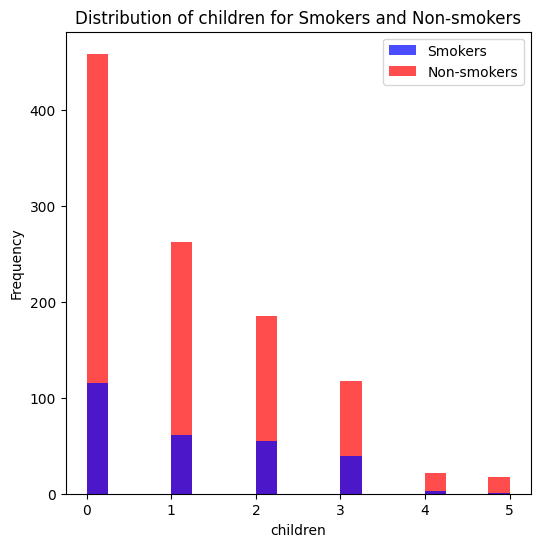

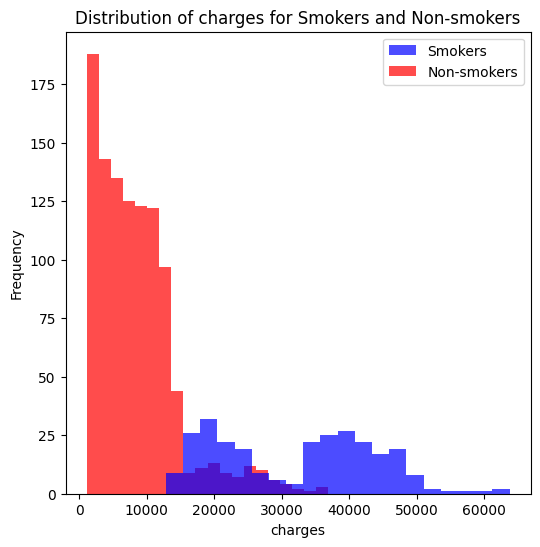

In [ ]:
for feature in data_numeric:
    plt.figure(figsize=(6, 6))
    plt.hist(smokers[feature], bins=20, alpha=0.7, label='Smokers', color='blue', zorder=2)
    plt.hist(non_smokers[feature], bins=20, alpha=0.7, label='Non-smokers', color='red', zorder=1)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} for Smokers and Non-smokers')
    plt.legend()
    plt.show()

Based on the plotted histograms, the distribution of charges for smokers and non-smokers is noticeably different. Smokers tend to have higher charges, as indicated by the blue bars extending further to the right compared to the red bars.

Now let's see if the gender influences being a smoker or not.
<br>We can use crosstabbing and then plot distributions

smoker   no  yes
sex             
female  547  115
male    517  159


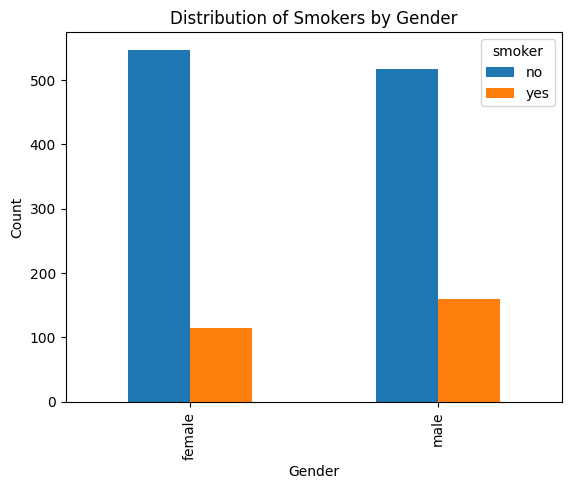

In [ ]:
gender_crosstab = pd.crosstab(df['sex'], df['smoker'])
print(gender_crosstab)
gender_crosstab.plot(kind='bar')
plt.title('Distribution of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The graph shows that there are more non-smokers than smokers in this dataset. While there are slightly more female non-smokers than male non-smokers, the difference is not very large.  The same pattern is seen for smokers, with slightly more male smokers than female smokers.

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


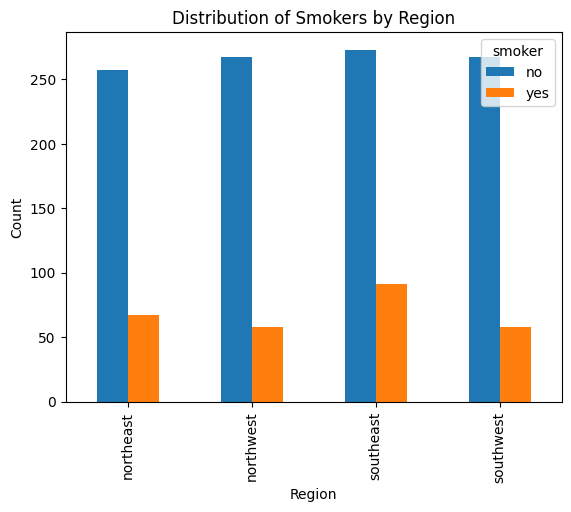

In [ ]:
region_crosstab = pd.crosstab(df['region'], df['smoker'])
print(region_crosstab)
region_crosstab.plot(kind='bar')
plt.title('Distribution of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
df['sex'] = df['sex'].map({'male' : 0 , 'female' : 1})

And now the smokers column

In [ ]:
df['smoker'] = df['smoker'].map({'no' : 0 , 'yes' : 1})

And now the Region Column

In [ ]:
print(df['region'].unique())
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast':3})
df.head()

['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
df = df / df.max()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.000000,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.333333,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.333333,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.666667,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.666667,0.060637


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42

In [ ]:
X = df.drop('smoker', axis=1)
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape} , {y_test.shape}")

Training data shape: (1068, 6), (1068,)
Test data shape: (267, 6) , (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Evaluation

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_1,
      "\nPrecision:",precision_1,
      "\nRecall:", recall_1,
      "\nF1 Score:", f1_1)

Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018691


The recall and F1-score can be improved.

- Recall measures how well the model identifies positive cases. In this case, it means correctly identifying smokers. A low recall suggests the model is missing many actual smokers.
- F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Improving recall will likely also improve the F1-score.

##5. Model Improvement

####Handle data Imbalance

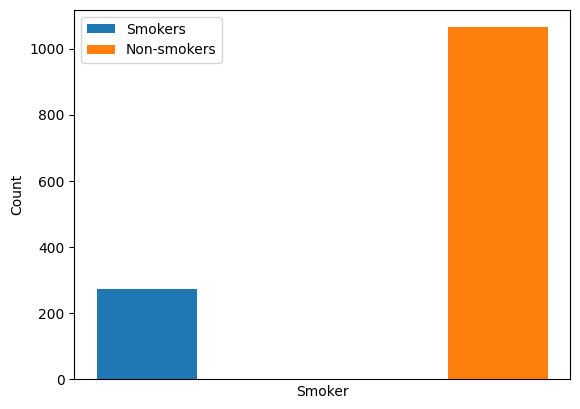

In [ ]:
plt.hist([smokers['smoker'], non_smokers['smoker']], bins=2, label=['Smokers', 'Non-smokers'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend()
plt.show()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)

x_new, y_new = over.fit_resample(X, y)
x_new, y_new = under.fit_resample(x_new, y_new)

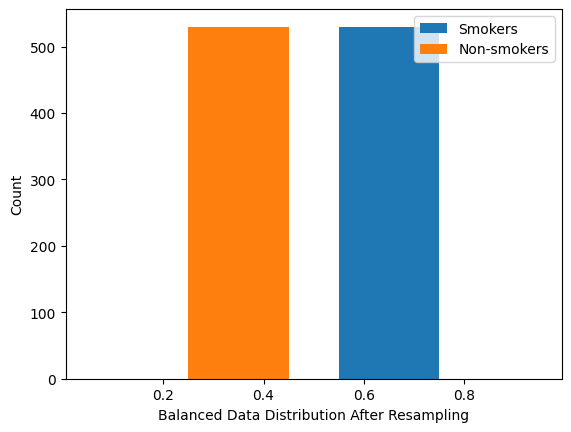

In [ ]:
somkers_new = y_new[y_new == 1]
non_smokers_new = y_new[y_new == 0]

plt.hist([somkers_new, non_smokers_new], bins=2, label=['Smokers', 'Non-smokers'])
plt.xlabel('Balanced Data Distribution After Resampling')
plt.ylabel('Count')
plt.legend()
plt.show()

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

new_model = LogisticRegression()
new_model.fit(new_X_train, new_y_train)

LogisticRegression()

In [ ]:
new_y_pred = new_model.predict(new_X_test)

accuracy_2 = accuracy_score(new_y_test, new_y_pred)
precision_2 = precision_score(new_y_test, new_y_pred)
recall_2 = recall_score(new_y_test, new_y_pred)
f1_2 = f1_score(new_y_test, new_y_pred)

print("Accuracy:", accuracy_2,
      "\nPrecision:",precision_2,
      "\nRecall:", recall_2,
      "\nF1 Score:", f1_2)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(solver='liblinear')

LRparam_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose=3, cv=5)

LR_search.fit(new_X_train, new_y_train)

print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.976 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.965 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.971 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.982 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.959 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.959 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.929 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.924 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.929 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.893 total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.982 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l1;

In [ ]:
LR_y_pred = LR_search.predict(new_X_test)

accuracy_3 = accuracy_score(new_y_test, LR_y_pred)
precision_3 = precision_score(new_y_test, LR_y_pred)
recall_3 = recall_score(new_y_test, LR_y_pred)
f1_3 = f1_score(new_y_test, LR_y_pred)

print("Accuracy:", accuracy_3,
      "\nPrecision:",precision_3,
      "\nRecall:", recall_3,
      "\nF1 Score:", f1_3)

Accuracy: 0.9669811320754716 
Precision: 0.9339622641509434 
Recall: 1.0 
F1 Score: 0.9658536585365853


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=10)
ad.fit(new_X_train, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [ ]:
ad_y_pred = ad.predict(new_X_test)

accuracy_4 = accuracy_score(new_y_test, ad_y_pred)
precision_4 = precision_score(new_y_test, ad_y_pred)
recall_4 = recall_score(new_y_test, ad_y_pred)
f1_4 = f1_score(new_y_test, ad_y_pred)

print("Accuracy:", accuracy_4,
      "\nPrecision:",precision_4,
      "\nRecall:", recall_4,
      "\nF1 Score:", f1_4)

Accuracy: 0.9669811320754716 
Precision: 0.9339622641509434 
Recall: 1.0 
F1 Score: 0.9658536585365853


In [ ]:
ad = AdaBoostClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ad, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(new_X_train, new_y_train)

best_ad = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

ad_y_pred = best_ad.predict(new_X_test)

accuracy_4 = accuracy_score(new_y_test, ad_y_pred)
precision_4 = precision_score(new_y_test, ad_y_pred)
recall_4 = recall_score(new_y_test, ad_y_pred)
f1_4 = f1_score(new_y_test, ad_y_pred)

print("Accuracy:", accuracy_4)
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1 Score:", f1_4)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Accuracy: 0.9764150943396226
Precision: 0.9519230769230769
Recall: 1.0
F1 Score: 0.9753694581280788
